In [1]:
import pandas
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.spatial


module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [4]:


def processText(column,n):#to remove stop words,to convert into lowercase and root word
    import re

    corpus = []
    for i in range(n):
        review = re.sub('[^a-zA-Z]', ' ', column[i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    return corpus


In [5]:
def embed(input):
  return model(input)

In [6]:


df = pandas.read_csv('./'+'ORCL_combine.csv')


df=df.dropna()
df = df[~(df['datetime'] >= '2023-01-01')]#dropping rows of year=2023

df=df.reset_index(drop=True)


print(df.columns)

titleColumn=df['title']
summaryColumn=df['summary']
dateColumn=df['datetime']
titleColumn=list(titleColumn)
summaryColumn=list(summaryColumn)

corpus=processText(titleColumn,len(titleColumn))#preprocessing title column
df['title']=corpus

summaryCorpus=processText(summaryColumn,len(summaryColumn))#preprocessing summary column
df['summary']=summaryCorpus


df = df.astype({'title':'string'})
df = df.astype({'summary':'string'})

print(df.tail(5))

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'y_actual', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'summary', 'title'],
      dtype='object')
       datetime      close       open        low       high     volume  \
969  2022-12-22  79.854912  80.940002  79.430000  81.169998  8181400.0   
970  2022-12-23  80.212074  80.510002  79.989998  80.900002  4129100.0   
971  2022-12-27  80.341049  80.879997  80.610001  81.470001  4290700.0   
972  2022-12-28  79.696182  81.089996  80.190002  81.639999  3794000.0   
973  2022-12-29  80.757736  80.970001  80.699997  81.800003  3867800.0   

     y_actual       evm   forc

In [7]:
df.shape

(974, 29)

In [8]:
titleColumn=df['title']
titleColumn[0]


'snow bring playtim town oracl kgun tucson news local oracl employe appear rock titan game santa monica daili press ice skate weekend oracl mvh oracl young justic outsid need chang oracl comic cinemablend jack sock coco vandewegh headlin newport beach oracl tenni world usa white male execut cultur palantir oracl reveal center investig report jedi war amazon oracl ibm battl mysteri world militari contract marketwatch billionair oracl founder larri ellison reveal bn stake tesla telegraph oracl park new name san francisco giant stadium replac espn espn san francisco giant score ballpark name right deal oracl busi journal liber elit patron damag oracl warrior highlight klay thompson torch new york knick oracl golden state mind food wish sold oracl park mccovey chronicl bata enhanc plan suppli chain effici oracl retail insight network nosql market boom worldwid mysql neo oracl databas openpr oracl park giant fan realli call san francisco chronicl librari improv elev system access oracl orac

In [9]:
summaryColumn=df['summary']
summaryColumn[0]

'enterpris expect save nearli per cent overal implement costscredit wipro limitedit servic compani wipro launch new platform aim simplifi custom migrat oracl cloud n wipro qumic demonstr expertis oracl cloud exampl continu invest oracl cloud develop said ravi purohit vice presid global head oracl servic line modern applic servic wipro limit n extend use wipro cloud studio qumic complement oracl cloud help custom significantli simplifi acceler improv time valu cloud implement n wipro innov qumic platform help organis move cost effect oracl cloud greater speed reliabl ad camillo speroni vice presid worldwid strateg allianc oracl n combin qumic autom capabl eas use ensur organis seek acceler oracl cloud migrat success transform softwar affect hundr android app download collect million time research said noracl research first stumbl across drainerbot last summer network analyst flag suspici spike data traffic android devic nthe app oracl list either never appear googl app store remov previ

In [10]:
df.head(5)

,datetime,close,open,low,high,volume,y_actual,evm,force_index,rsi,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,summary,title
0,2019-02-20,48.230774,52.000000,51.500000,52.209999,13440900.0,1.0,0.585703,1.765600e+07,73.266702,...,14551000.0,26557000.0,-42056000.0,12891000.0,108709000.0,86346000.0,22363000.0,74036000.0,enterpris expect save nearli per cent overal i...,snow bring playtim town oracl kgun tucson news...
1,2019-02-21,48.547531,51.630001,51.509998,52.349998,14759500.0,1.0,0.580816,2.585080e+07,75.145654,...,14551000.0,26557000.0,-42056000.0,12891000.0,108709000.0,86346000.0,22363000.0,74036000.0,rdx manag databas cloud servic provid acquir c...,rdx acquir amazon aw cloud oracl partner clckw...
2,2019-02-22,48.892227,52.389999,52.200001,52.599998,11689700.0,1.0,0.535946,1.818712e+07,77.037062,...,14551000.0,26557000.0,-42056000.0,12891000.0,108709000.0,86346000.0,22363000.0,74036000.0,oracl releas new version oracl databas everi y...,first take oracl c use enhanc dba techtarget
3,2019-02-25,48.966766,52.750000,52.459999,53.029999,14722200.0,1.0,0.570338,2.098508e+07,77.436927,...,14551000.0,26557000.0,-42056000.0,12891000.0,108709000.0,86346000.0,22363000.0,74036000.0,brandon vallanc special santa cruz sentinel sa...,usf keep student safe oracl oracl santa cruz w...
4,2019-02-26,49.004025,52.459999,52.240002,52.880001,12041300.0,0.0,0.419178,1.525658e+07,77.646461,...,14551000.0,26557000.0,-42056000.0,12891000.0,108709000.0,86346000.0,22363000.0,74036000.0,buffett wide public invest strategi buy share ...,sae close five year tennesse tech oracl warren...


In [11]:
df.tail(5)

,datetime,close,open,low,high,volume,y_actual,evm,force_index,rsi,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,summary,title
969,2022-12-22,79.854912,80.940002,79.430000,81.169998,8181400.0,1.0,-6.236806,-2.321417e+07,52.830683,...,9539000.0,11220000.0,-29126000.0,5028000.0,109297000.0,115065000.0,-5768000.0,66342000.0,melodi oracl sequenc synthes board game spirit...,melodi oracl sequenc synthes board game spirit...
970,2022-12-23,80.212074,80.510002,79.989998,80.900002,4129100.0,1.0,-0.847834,5.817069e+06,54.142365,...,9539000.0,11220000.0,-29126000.0,5028000.0,109297000.0,115065000.0,-5768000.0,66342000.0,cloud war expo moment sabina zafar head techno...,oracl solv digit transform challeng financi ac...
971,2022-12-27,80.341049,80.879997,80.610001,81.470001,4290700.0,0.0,3.246997,8.811661e+06,54.632971,...,9539000.0,11220000.0,-29126000.0,5028000.0,109297000.0,115065000.0,-5768000.0,66342000.0,mann grandstaff va medic center lose staff see...,oracl report boom growth signal billion purcha...
972,2022-12-28,79.696182,81.089996,80.190002,81.639999,3794000.0,1.0,2.821537,5.834340e+06,51.657183,...,9539000.0,11220000.0,-29126000.0,5028000.0,109297000.0,115065000.0,-5768000.0,66342000.0,highlight tuesday analyst blog top analyst rep...,zack analyst blog highlight abbvi pepsico orac...
973,2022-12-29,80.757736,80.970001,80.699997,81.800003,3867800.0,1.0,2.772182,5.103606e+06,55.914175,...,9539000.0,11220000.0,-29126000.0,5028000.0,109297000.0,115065000.0,-5768000.0,66342000.0,data ychartsevolv busi modeloracl busi segment...,oracl undervalu huge hybrid cloud tailwind orc...


In [12]:
df.columns

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'y_actual', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'summary', 'title'],
      dtype='object')

In [13]:
df['y_actual']

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
969    1.0
970    1.0
971    0.0
972    1.0
973    1.0
Name: y_actual, Length: 974, dtype: float64

In [14]:
y=df['y_actual']

y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
969    1.0
970    1.0
971    0.0
972    1.0
973    1.0
Name: y_actual, Length: 974, dtype: float64

In [15]:
column_names=["y_actual"]

# Create DataFrame by assigning column names
y_df=pd.DataFrame(y, columns=column_names)

In [16]:
y_df

,y_actual
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
969,1.0
970,1.0
971,0.0
972,1.0


In [17]:

y_df['datetime']=df['datetime']

In [18]:
y_df.head(5)

,y_actual,datetime
0,1.0,2019-02-20
1,1.0,2019-02-21
2,1.0,2019-02-22
3,1.0,2019-02-25
4,0.0,2019-02-26


In [19]:
y_df.shape

(974, 2)

In [20]:
y_df.tail(5)

,y_actual,datetime
969,1.0,2022-12-22
970,1.0,2022-12-23
971,0.0,2022-12-27
972,1.0,2022-12-28
973,1.0,2022-12-29


In [21]:

df=df.drop(['datetime','title','summary','y_actual'],axis='columns')#dropping the date column


In [23]:
from sklearn.preprocessing import MinMaxScaler
 
 
# scale features
scaler = MinMaxScaler()

scaled_data=scaler.fit_transform(df)
 
df=scaled_data


In [24]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.165764,0.172234,0.188429,0.139975,0.188259,0.525536,0.492169,0.872258,0.729416,0.416979,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
1,0.170764,0.166376,0.188589,0.142199,0.211490,0.525428,0.503436,0.902558,0.759781,0.418910,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
2,0.176205,0.178407,0.199616,0.146171,0.157408,0.524437,0.492899,0.933058,0.818794,0.425417,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
3,0.177382,0.184106,0.203772,0.153003,0.210833,0.525196,0.496746,0.939506,0.807272,0.428163,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
4,0.177970,0.179516,0.200256,0.150620,0.163602,0.521857,0.488870,0.942885,0.729887,0.427549,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.664973,0.630363,0.634809,0.600095,0.095601,0.374808,0.435973,0.542715,0.528986,0.297859,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000
970,0.670611,0.623556,0.643759,0.595806,0.024210,0.493865,0.475891,0.563866,0.558726,0.307136,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000
971,0.672647,0.629413,0.653668,0.604862,0.027057,0.584331,0.480008,0.571778,0.607205,0.318004,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000
972,0.662467,0.632737,0.646955,0.607563,0.018306,0.574932,0.475914,0.523791,0.540432,0.310192,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000


In [25]:
df.shape

(974, 25)

In [26]:
from textblob import TextBlob

In [27]:
titleSentiment=[]

In [28]:
for content in titleColumn:
    blob = TextBlob(content)
    sentiment=blob.sentiment.polarity
    if sentiment<0:
      titleSentiment.append(0)
    else:
      titleSentiment.append(1)

In [29]:
summarySentiment=[]

In [30]:
for content in summaryColumn:
    blob = TextBlob(content)
    sentiment=blob.sentiment.polarity
    if sentiment<0:
      summarySentiment.append(0)
    else:
      summarySentiment.append(1)

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.165764,0.172234,0.188429,0.139975,0.188259,0.525536,0.492169,0.872258,0.729416,0.416979,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
1,0.170764,0.166376,0.188589,0.142199,0.211490,0.525428,0.503436,0.902558,0.759781,0.418910,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
2,0.176205,0.178407,0.199616,0.146171,0.157408,0.524437,0.492899,0.933058,0.818794,0.425417,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
3,0.177382,0.184106,0.203772,0.153003,0.210833,0.525196,0.496746,0.939506,0.807272,0.428163,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
4,0.177970,0.179516,0.200256,0.150620,0.163602,0.521857,0.488870,0.942885,0.729887,0.427549,...,0.156597,0.257282,0.78954,1.000000,0.000000,0.901307,0.000000,0.000000,1.0,0.493047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.664973,0.630363,0.634809,0.600095,0.095601,0.374808,0.435973,0.542715,0.528986,0.297859,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000
970,0.670611,0.623556,0.643759,0.595806,0.024210,0.493865,0.475891,0.563866,0.558726,0.307136,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000
971,0.672647,0.629413,0.653668,0.604862,0.027057,0.584331,0.480008,0.571778,0.607205,0.318004,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000
972,0.662467,0.632737,0.646955,0.607563,0.018306,0.574932,0.475914,0.523791,0.540432,0.310192,...,1.000000,0.666262,0.00000,0.613239,0.359927,0.000000,0.026252,0.740009,0.0,0.000000


In [32]:

text_vector=[]# will contain vector representation of titleColumn
summary_vector=[]

In [33]:
for text in titleColumn:
    sentence = text
    message_embeddings = embed([sentence])
    temp=np.array(message_embeddings[0])
    temp=temp.T
    text_vector.append(temp)


In [34]:
for summary in summaryColumn:
    sentence = summary
    message_embeddings = embed([sentence])
    temp=np.array(message_embeddings[0])
    temp=temp.T
    summary_vector.append(temp)

In [35]:
text_vector=np.array(text_vector)
summary_vector=np.array(summary_vector)

In [36]:
text_vector.shape

(974, 512)

In [37]:
summary_vector.shape

(974, 512)

In [39]:
scaler = MinMaxScaler()
scaled_data_text=scaler.fit_transform(text_vector)


In [41]:
scaler = MinMaxScaler()
scaled_data_summary=scaler.fit_transform(summary_vector)


In [50]:
pca = PCA(n_components = 30)
pca.fit(scaled_data_text)
data_pca_text = pca.transform(scaled_data_text)
data_pca_text

array([[ 1.2937373 ,  0.15132698, -0.88365823, ...,  0.22603025,
         0.24523802, -0.5909831 ],
       [ 0.8623166 , -2.0995646 ,  0.1040715 , ...,  1.1527777 ,
         0.0653847 ,  0.7209247 ],
       [ 2.4815824 , -1.1008501 , -0.23640254, ..., -0.36306113,
        -0.04539463,  0.19669881],
       ...,
       [-1.3401647 , -0.2804259 , -0.6796906 , ...,  0.2740958 ,
         0.09922391, -0.37132993],
       [ 0.2801963 , -1.1163684 , -0.89302546, ...,  0.11347748,
        -0.28570038, -0.6367668 ],
       [ 0.6270045 , -0.29991615, -0.39924717, ..., -0.07430419,
         1.0644007 , -0.06315435]], dtype=float32)

In [51]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

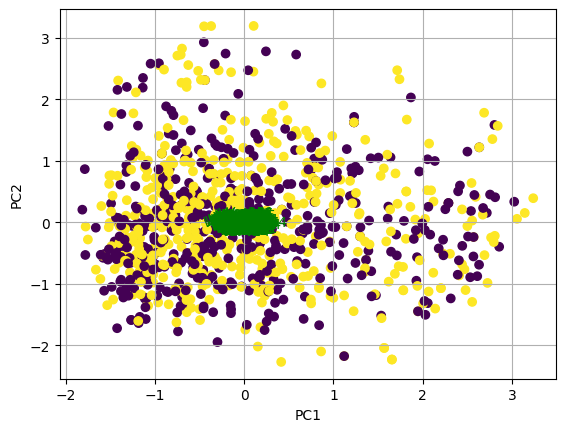

In [52]:
myplot(data_pca_text[:,0:2], pca.components_.T) 
plt.show()

In [53]:
pca = PCA(n_components = 30)
pca.fit(scaled_data_summary)
data_pca_summary = pca.transform(scaled_data_summary)
data_pca_summary

array([[ 3.8564436 ,  0.22532955, -0.2037182 , ...,  0.19089112,
         0.59632355,  0.05295328],
       [-1.782284  , -0.43960118, -0.9590811 , ..., -0.91498727,
        -0.32836762, -0.4674629 ],
       [-1.8109562 ,  0.9843352 ,  1.5231762 , ..., -0.21799049,
        -0.45842   ,  0.78302664],
       ...,
       [ 0.10983343, -1.616571  , -0.71057296, ..., -0.04788539,
         0.3772198 , -0.05459372],
       [-0.7072371 , -0.3905599 , -0.01518179, ...,  0.14747618,
        -0.22557634,  0.12167725],
       [-2.2135758 , -1.1636304 , -1.1737976 , ...,  0.30923805,
         0.48820934,  0.04045145]], dtype=float32)

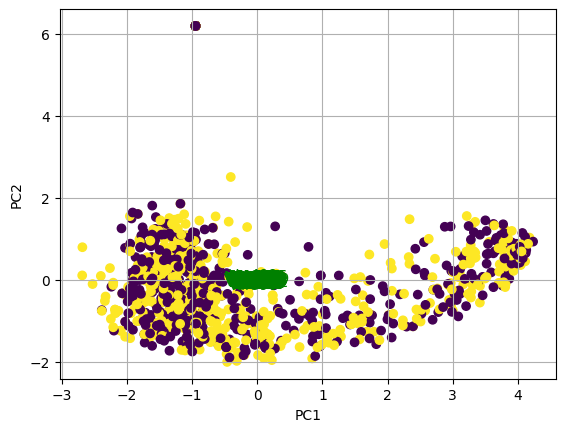

In [54]:
myplot(data_pca_summary[:,0:2], pca.components_.T) 
plt.show()